In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

In [2]:
picture_size = 48
folder_path = "./images/"

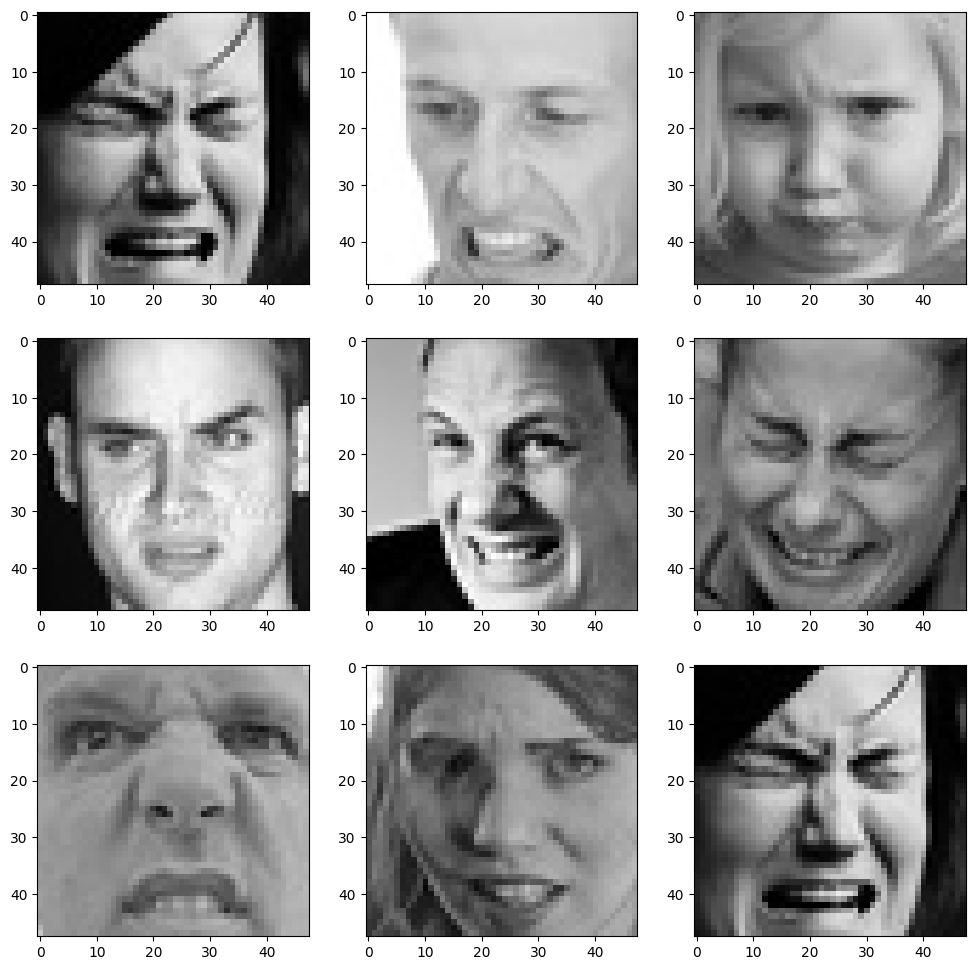

In [3]:
expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

# Delar upp Tränings och ValideringData


In [4]:
# Function to load and preprocess data
def load_data(folder_path, target_size=(48, 48), color_mode="grayscale"):
    data = []
    labels = []
    class_names = os.listdir(folder_path)

    label_encoder = LabelEncoder()
    label_encoder.fit(class_names)

    for class_folder in class_names:
        class_folder_path = os.path.join(folder_path, class_folder)
        for img_name in os.listdir(class_folder_path):
            img_path = os.path.join(class_folder_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE if color_mode == "grayscale" else cv2.IMREAD_COLOR)
            img = cv2.resize(img, target_size)
            img = img.astype('float32') / 255.0  # Rescale the images
            data.append(img)
            labels.append(label_encoder.transform([class_folder])[0])

    data = np.array(data)
    data = np.expand_dims(data, -1) if color_mode == "grayscale" else data
    labels = to_categorical(np.array(labels), num_classes=len(class_names))

    return data, labels

In [5]:
# Set paths to your data folders
train_folder = './images/train'
validation_folder = './images/validation'

In [6]:
# Load training data
X_train, y_train = load_data(train_folder, target_size=(48, 48), color_mode="grayscale")

# Load validation data
X_val, y_val = load_data(validation_folder, target_size=(48, 48), color_mode="grayscale")


# Bygger modellen


In [7]:
model = Sequential()

# 1st CNN layer
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd CNN layer
model.add(Conv2D(128, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd CNN layer
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th CNN layer
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Fully connected 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output layer for 7 classes (emotions)
model.add(Dense(7, activation='softmax'))

# Compile the model
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\Jontes\anaconda3\envs\pythonenv311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,02

 Total params: 4,478,727 (17.08 MB)

 Trainable params: 4,474,759 (17.07 MB)

 Non-trainable params: 3,968 (15.50 KB)

# kompilerar modellen och kör .fit()

In [8]:
# Set up callbacks
checkpoint = ModelCheckpoint("./emotion_model_sklearn.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
reduce_learningrate = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1)

# Train the model
history = model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=50,
    validation_data=(X_val, y_val),
    callbacks=[checkpoint, early_stopping, reduce_learningrate]
)

Epoch 1/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2236 - loss: 2.1590
Epoch 1: val_accuracy improved from -inf to 0.16657, saving model to ./emotion_model_sklearn.keras
226/226 ━━━━━━━━━━━━━━━━━━━━ 346s 2s/step - accuracy: 0.2237 - loss: 2.1583 - val_accuracy: 0.1666 - val_loss: 2.0264 - learning_rate: 0.0010
Epoch 2/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3750 - loss: 1.6311
Epoch 2: val_accuracy improved from 0.16657 to 0.30541, saving model to ./emotion_model_sklearn.keras
226/226 ━━━━━━━━━━━━━━━━━━━━ 331s 1s/step - accuracy: 0.3751 - loss: 1.6307 - val_accuracy: 0.3054 - val_loss: 1.8080 - learning_rate: 0.0010
Epoch 3/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4645 - loss: 1.3780
Epoch 3: val_accuracy improved from 0.30541 to 0.44353, saving model to ./emotion_model_sklearn.keras
226/226 ━━━━━━━━━━━━━━━━━━━━ 325s 1s/step - accuracy: 0.4646 - loss: 1.3779 - val_accuracy: 0.4435 - val_loss: 1.4470 - learning_rate: 0.0010
Epoch 4/50
226/2

# Accuracy och Loss


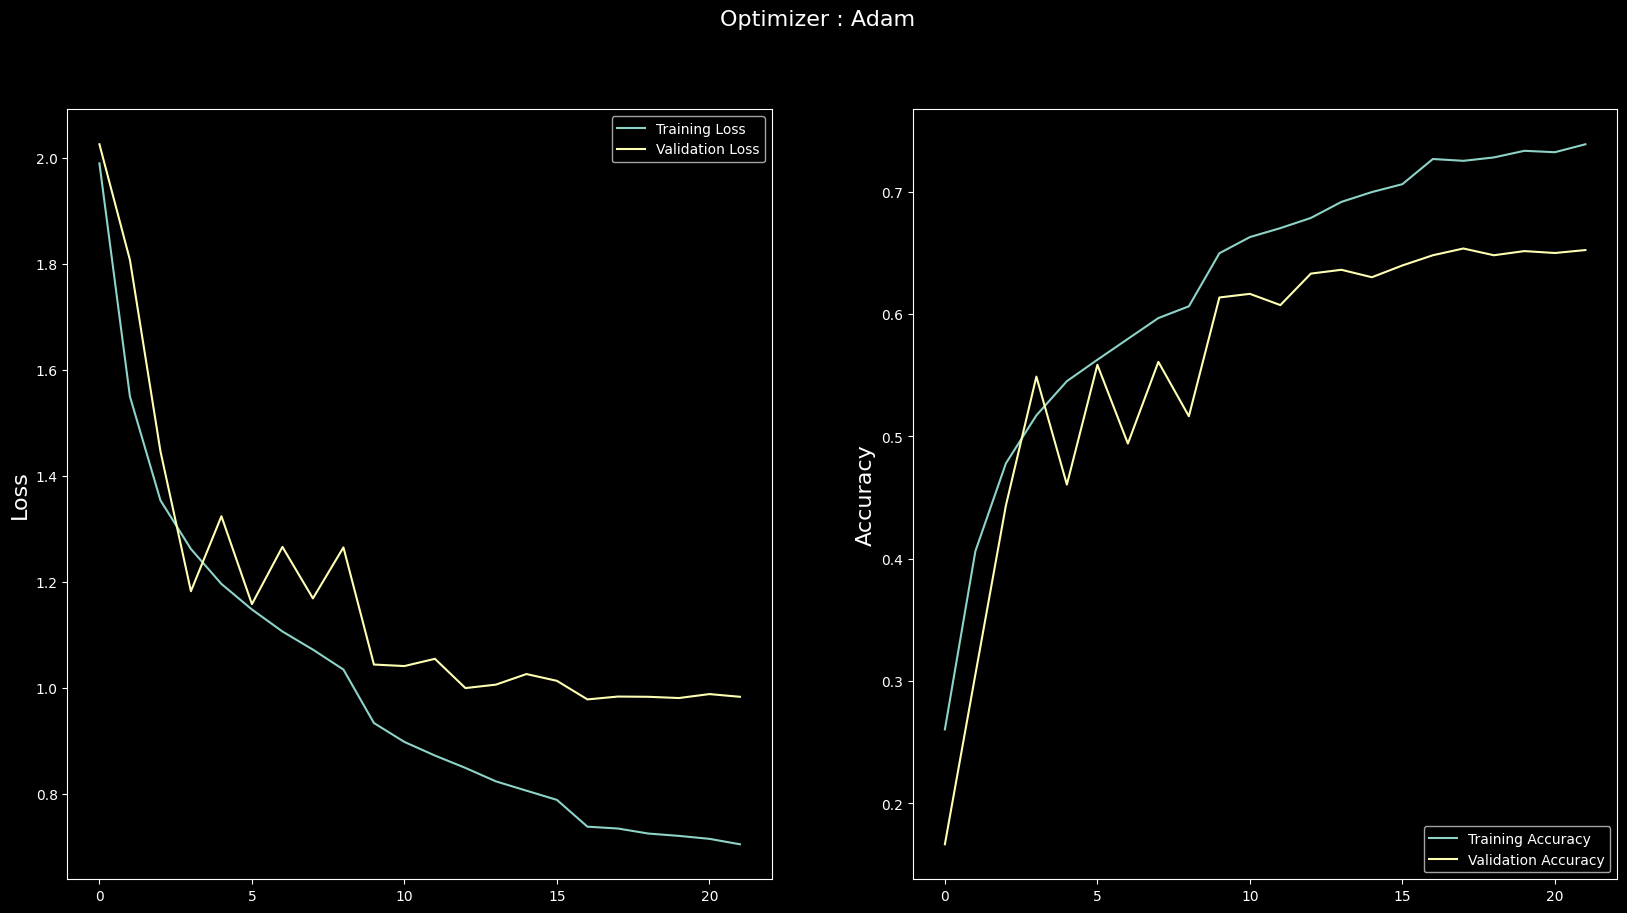

In [9]:
plt.style.use('dark_background')

plt.figure(figsize=(20, 10))

# Plotting the Loss
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

# Plotting the Accuracy
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')

# Display the plots
plt.show()

221/221 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step


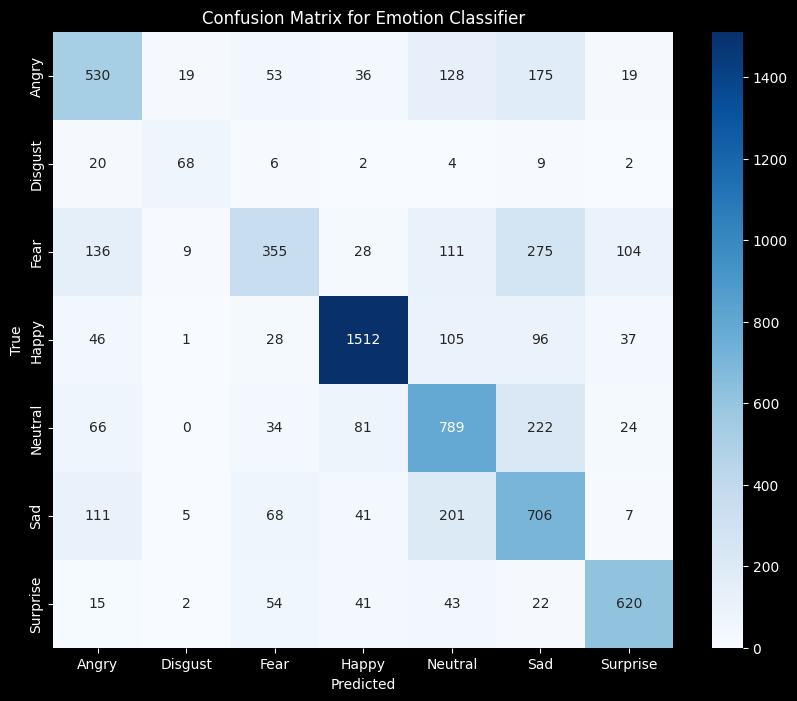

In [15]:
y_pred_probs = model.predict(X_val)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Convert true labels from one-hot encoded to class labels
y_true = np.argmax(y_val, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Emotion Classifier')
plt.show()